In [5]:
import pandas as pd
import numpy as np

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#loading the data
df= pd.read_csv('911.csv')

In [8]:
df.head(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


In [12]:
#top 5 zipcodes
df['zip'].value_counts().head(5)

zip
19401.0    45606
19464.0    43910
19403.0    34888
19446.0    32270
19406.0    22464
Name: count, dtype: int64

In [13]:
#top 5 towen ship
df['twp'].value_counts().head(5)

twp
LOWER MERION    55490
ABINGTON        39947
NORRISTOWN      37633
UPPER MERION    36010
CHELTENHAM      30574
Name: count, dtype: int64

In [18]:
#how many unique title there
df['title'].nunique()

148

In [21]:
#creating a new colmun
df['Reason']=df['title'].apply(lambda title: title.split(':')[0]  )

In [22]:
df['Reason']

0             EMS
1             EMS
2            Fire
3             EMS
4             EMS
           ...   
663517    Traffic
663518        EMS
663519        EMS
663520       Fire
663521    Traffic
Name: Reason, Length: 663522, dtype: object

In [23]:
#what is the most comun reason for the 911 colmun
df['Reason'].value_counts()

Reason
EMS        332692
Traffic    230208
Fire       100622
Name: count, dtype: int64

C:\Users\21652\AppData\Local\Temp\ipykernel_12632\707001465.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Reason', data=df, palette='viridis')


<Axes: xlabel='Reason', ylabel='count'>

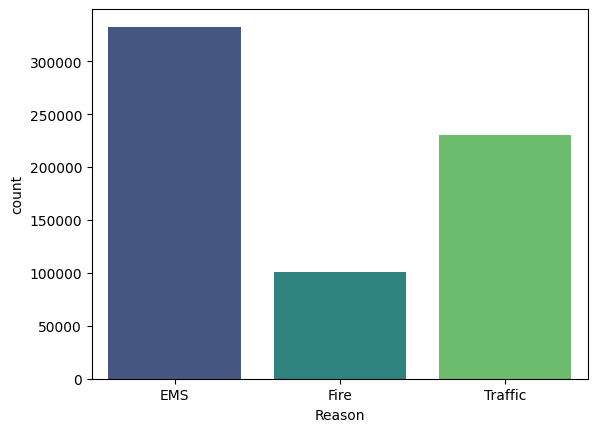

In [27]:
#using seaborn to create a countplot of 911 calls by Reason
sns.countplot(x='Reason', data=df, palette='viridis')

In [29]:
#what is the datatype of the objects in the timestamp
df['timeStamp'].dtype

dtype('O')

In [32]:
#turning time stamp 
df['timeStamp']=pd.to_datetime(df['timeStamp'])

In [34]:
df['timeStamp'].iloc[0]

Timestamp('2015-12-10 17:10:52')

In [36]:
#using columns for hour 
df['Hour']= df['timeStamp'].apply(lambda time: time.hour)

In [37]:
df['minute'] = df['timeStamp'].apply(lambda time: time.minute)

In [38]:
df['second'] = df['timeStamp'].apply(lambda time: time.second)

In [39]:
df['year'] = df['timeStamp'].apply(lambda time: time.year)

In [40]:
df['month'] = df['timeStamp'].apply(lambda time: time.month)

In [42]:
df['dayofweek'] = df['timeStamp'].apply(lambda time: time.dayofweek)

In [44]:
df['dayofweek']=df['dayofweek'].map({0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'})

<Axes: xlabel='dayofweek', ylabel='count'>

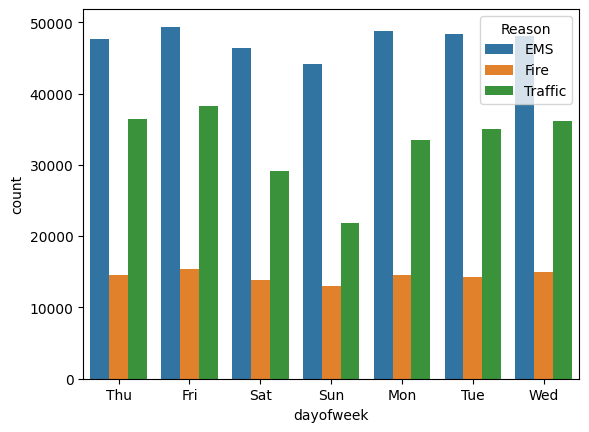

In [45]:
#using seaborn to plot dayof weeks based on reason
sns.countplot(x='dayofweek', data=df,hue='Reason')

In [47]:
#grouping df by month
byMonth = df.groupby('month').count()


In [48]:
byMonth

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,minute,second,year,dayofweek
month,,,,,,,,,,,,,,,
1,62336,62336,62336,55294,62336,62336,62312,62336,62336,62336,62336,62336,62336,62336,62336
2,55427,55427,55427,48922,55427,55427,55405,55427,55427,55427,55427,55427,55427,55427,55427
3,60027,60027,60027,53252,60027,60027,60001,60027,60027,60027,60027,60027,60027,60027,60027
4,53671,53671,53671,47349,53671,53671,53655,53671,53671,53671,53671,53671,53671,53671,53671
5,57509,57509,57509,50354,57509,57509,57474,57509,57509,57509,57509,57509,57509,57509,57509
6,60034,60034,60034,52593,60034,60034,60005,60034,60034,60034,60034,60034,60034,60034,60034
7,59832,59832,59832,52507,59832,59832,59802,59832,59832,59832,59832,59832,59832,59832,59832
8,48359,48359,48359,42311,48359,48359,48335,48359,48359,48359,48359,48359,48359,48359,48359
9,47213,47213,47213,41289,47213,47213,47196,47213,47213,47213,47213,47213,47213,47213,47213


<Axes: xlabel='month'>

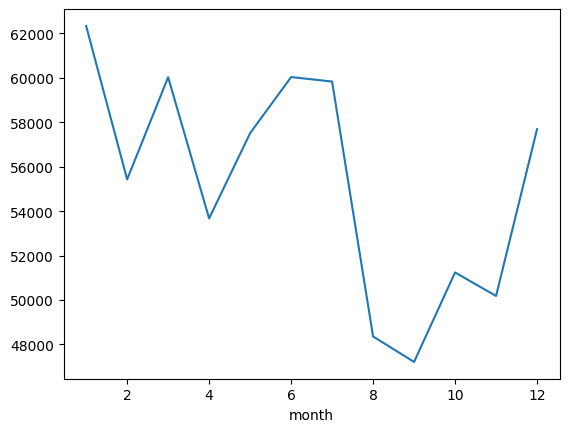

In [49]:
#now create a simple plot off the dataframe indicating the count of cells per month 
byMonth['lat'].plot()

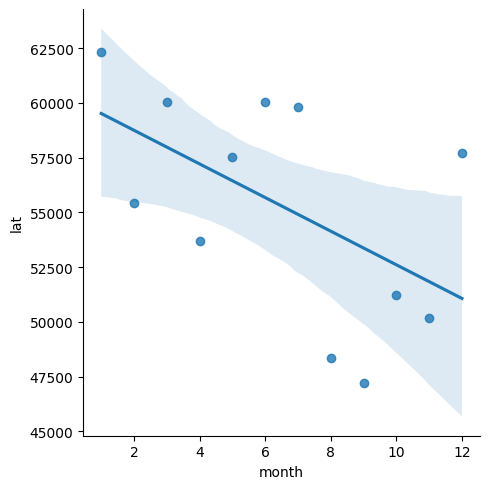

In [50]:
#using the lmolpot to create a linear fit on the number of cells per month
sns.lmplot(x='month', y='lat', data=byMonth.reset_index())

In [51]:
#creting a column calles date that contains the date from the timestamp
df['date']= df['timeStamp'].apply(lambda time: time.date())

In [52]:
df['date']

0         2015-12-10
1         2015-12-10
2         2015-12-10
3         2015-12-10
4         2015-12-10
             ...    
663517    2020-07-29
663518    2020-07-29
663519    2020-07-29
663520    2020-07-29
663521    2020-07-29
Name: date, Length: 663522, dtype: object

In [54]:
#now groupby this datecolmun 
groupDate=df.groupby('date').count()

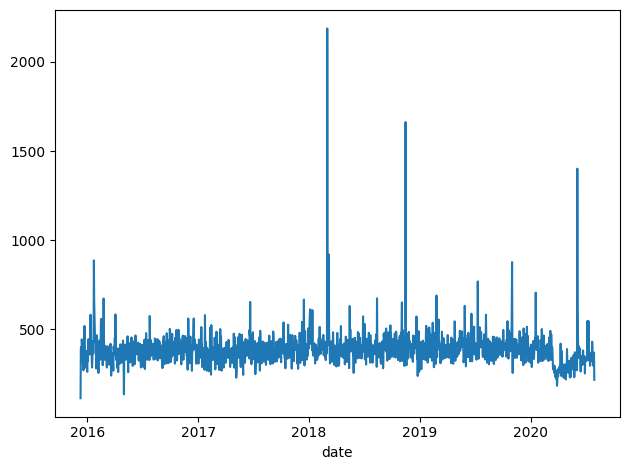

In [56]:
groupDate['lat'].plot()
plt.tight_layout()

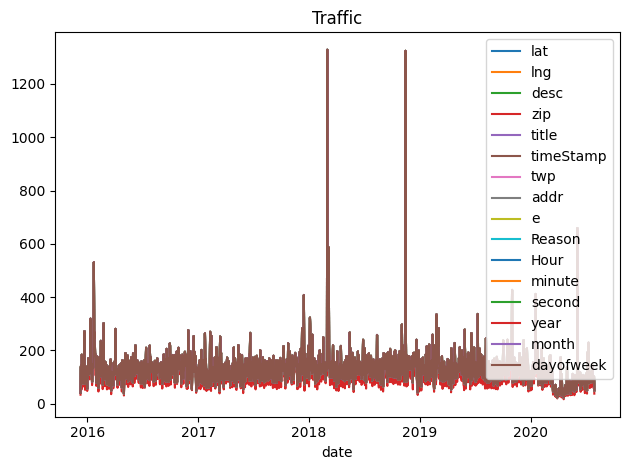

In [59]:
#creating the plot with the reason of the 911 calls
df[df['Reason'] == 'Traffic'].groupby('date').count().plot()
plt.title('Traffic')
plt.tight_layout()

In [63]:
#creating a heatmap
dayHour=df.groupby(by=['dayofweek', 'Hour']).count()['Reason'].unstack()

<Axes: xlabel='Hour', ylabel='dayofweek'>

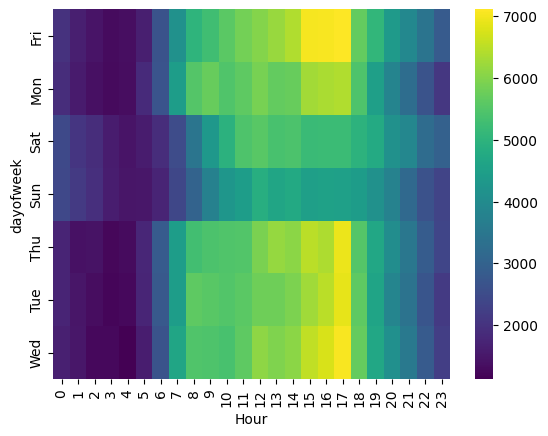

In [66]:
sns.heatmap(dayHour, cmap='viridis')